## How has terrorism changed over the years?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


According to the proposed data we consider how terrorism has changed over time.

In [2]:
data_ter = pd.read_csv('../input/gtd/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
#ds_lolat = pd.read_csv('../input/world-cities-database/worldcitiespop.csv')

In [3]:
data_ter = data_ter.dropna(thresh=160000,axis=1)
data_ter.head(5)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


Remove columns with a large number of missing values.

In [4]:
data_ter.dropna(thresh=160000,axis=1).shape

(181691, 47)

Descry full map of terrorist attacks. We can see attacks for all the time. Much more important to see the trend. To do this, we divide all data into ten-year segments.


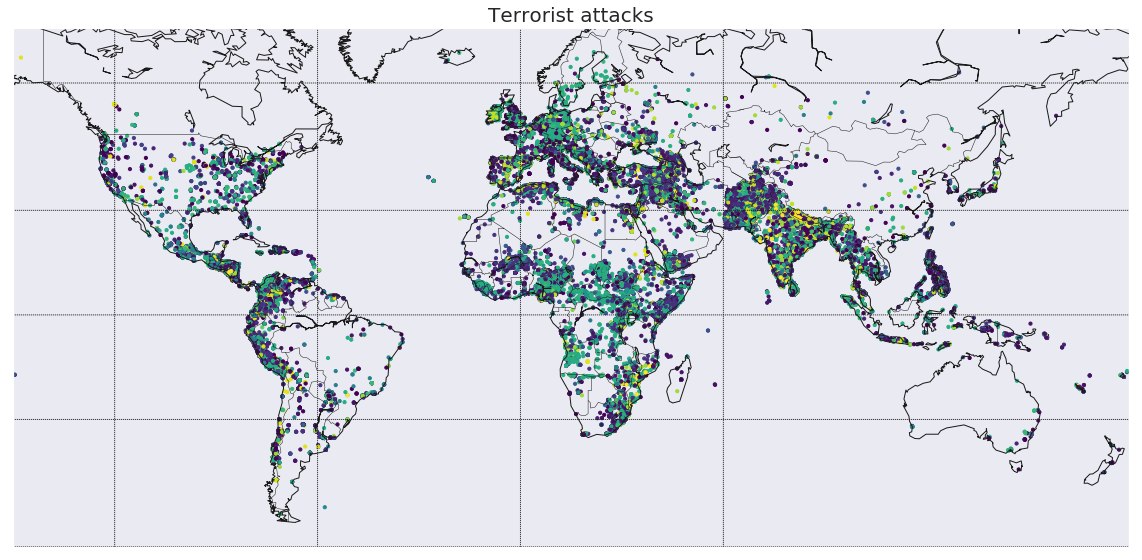

In [25]:
def mapWorld(col1,size2,label4,metr=100,colmap='hot',ds=data_ter,scat=False):
    datatt = ds
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-150,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-120,91.,30.))
    m.drawmeridians(np.arange(-120,90.,60.))
    
    #m.drawmapboundary(fill_color='#FFFFFF')
    lat = datatt['latitude'].values
    lon = datatt['longitude'].values
    a_1 = datatt[col1].values
    if size2:
        a_2 = datatt[size2].values
    else: a_2 = 1
    if scat:
        m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,edgecolors='black',cmap=colmap,alpha=1)
    else:
        m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,cmap=colmap,alpha=1)
    #cbar = m.colorbar()
    #cbar.set_label(label4,fontsize=30)
    #plt.clim(20000, 100000)
    #plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
plt.title('Terrorist attacks', fontsize=20)
mapWorld(col1='targtype1', size2=False,label4='',metr=10,colmap='viridis',ds=data_ter)

In 1970-1979 terrorist concentrates more tightly in Western Europe, Carribean and Middle East. <br>
In 1980-1989  - South America, Western Europe, Carribean. <br>
In 1990-1999, surge of terrorist activity - Western Europe, South Asia, South America, Middle East and North Africa. <br>
In the past 20 years, terrorists have been concentrated in South Asia, Middle Asia and Sub-Saharan Africa. <br>
For a clearer view, see the bar charts below.

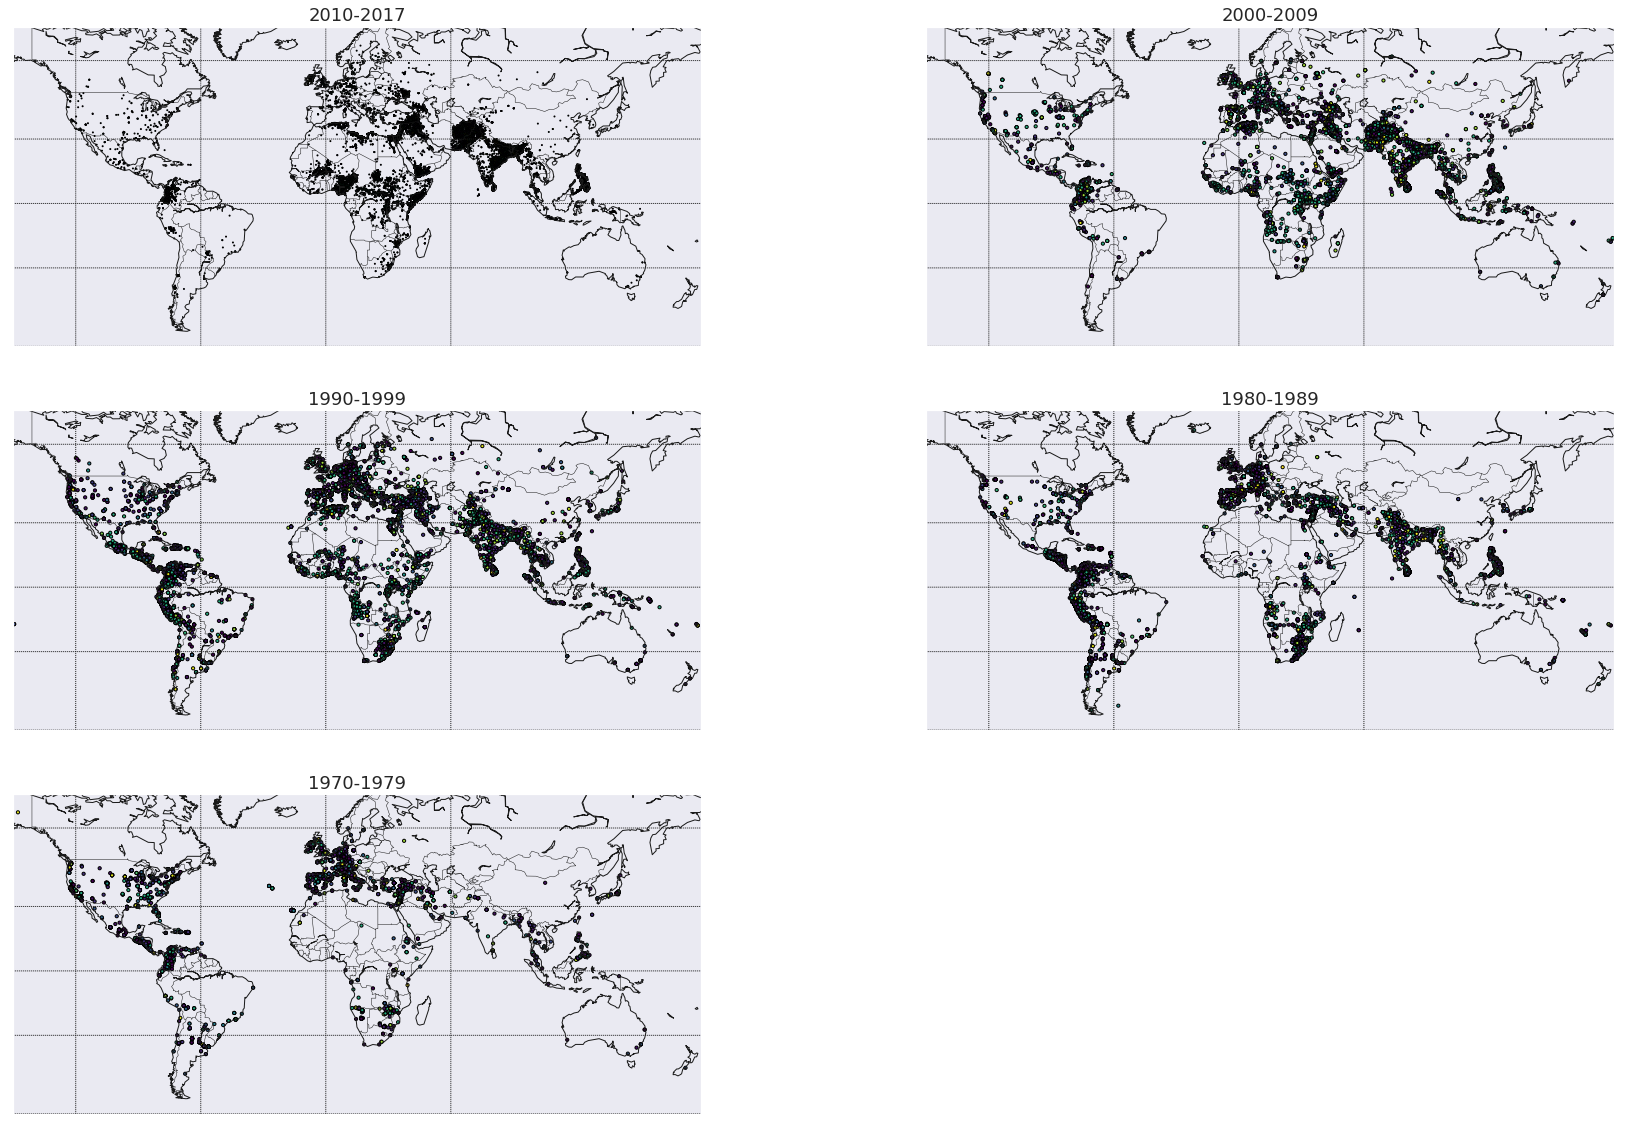

In [7]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(3,2,1)
ax1.set_title('2010-2017')
mapWorld(col1='targtype1',ds=data_ter[data_ter['iyear']>=2010], size2=False,label4='',metr=1,colmap='viridis',scat=True)
ax2 = fig.add_subplot(3,2,2)
ax2.set_title('2000-2009')
mapWorld(col1='targtype1',ds=data_ter[(data_ter['iyear']>=2000) & (data_ter['iyear']<2010)], \
         size2=False,label4='',metr=10,colmap='viridis',scat=True)
ax3 = fig.add_subplot(3,2,3)
ax3.set_title('1990-1999')
mapWorld(col1='targtype1',ds=data_ter[(data_ter['iyear']>=1990) & (data_ter['iyear']<2000)], \
         size2=False,label4='',metr=10,colmap='viridis',scat=True)
ax4 = fig.add_subplot(3,2,4)
ax4.set_title('1980-1989')
mapWorld(col1='targtype1',ds=data_ter[(data_ter['iyear']>=1980) & (data_ter['iyear']<1990)], \
         size2=False,label4='',metr=10,colmap='viridis',scat=True)
ax4 = fig.add_subplot(3,2,5)
ax4.set_title('1970-1979')
mapWorld(col1='targtype1',ds=data_ter[(data_ter['iyear']>=1970) & (data_ter['iyear']<1980)], \
         size2=False,label4='',metr=10,colmap='viridis',scat=True)
#plt.tight_layout()

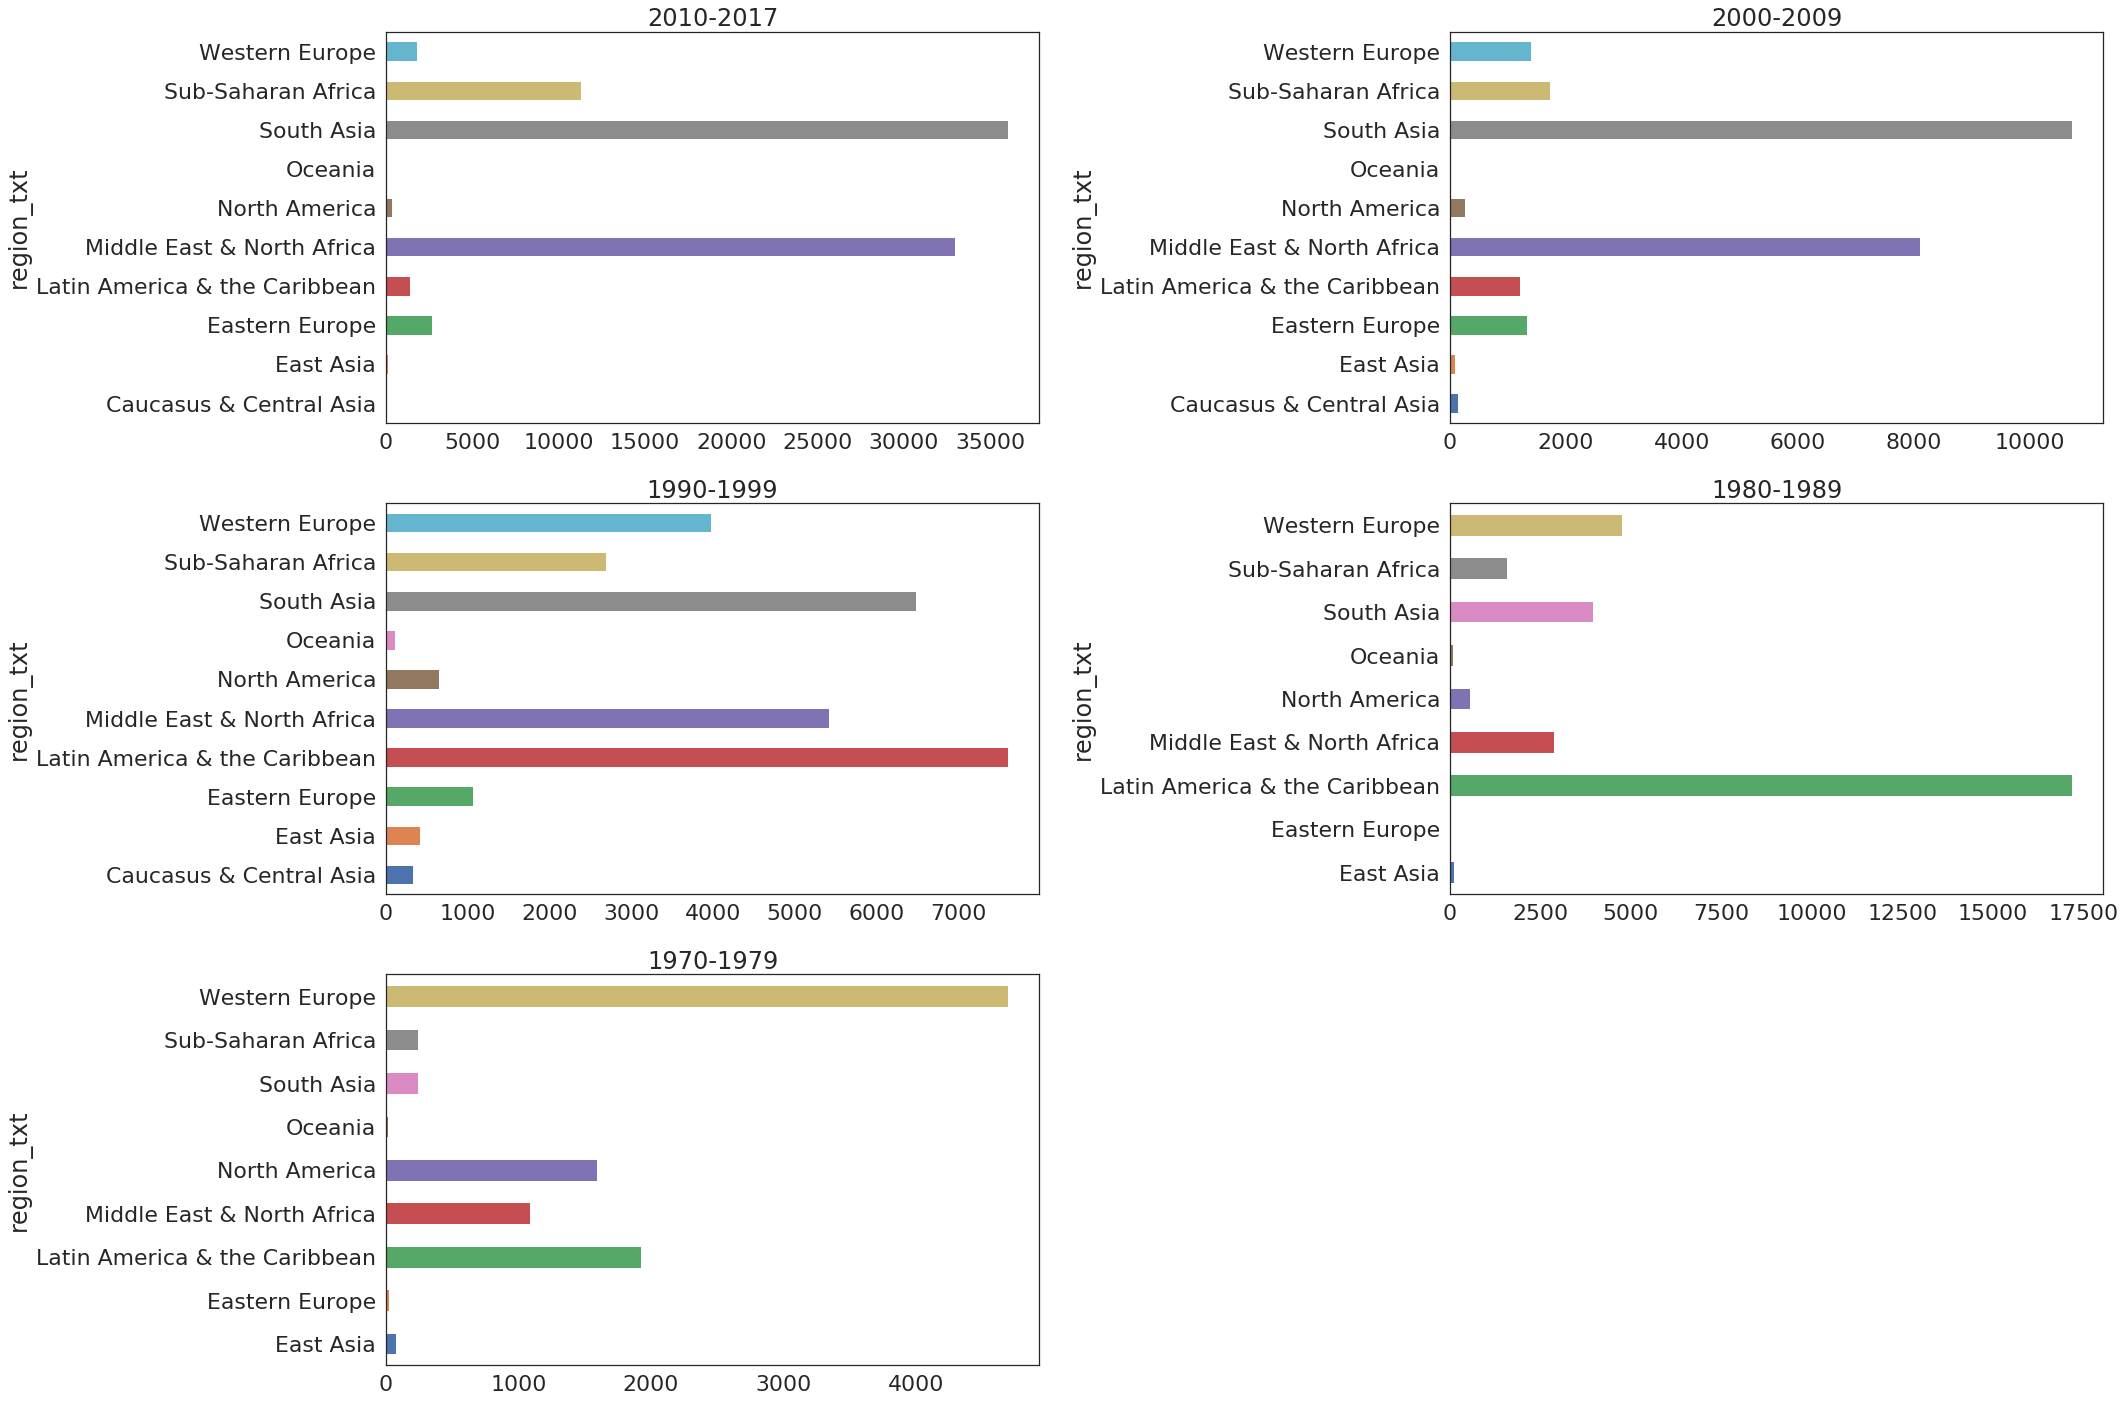

In [38]:
def plot_by_years(kind='region_txt',big=(30,20)):
    sns.set(style="white",font_scale=2)
    fig = plt.figure(figsize=big)
    ax1 = fig.add_subplot(3,2,1)
    ax1.set_title('2010-2017')
    ax1.set_ylabel('')
    ax1.set_xlabel('')
    data_ter[data_ter['iyear']>=2010]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax2 = fig.add_subplot(3,2,2)
    ax2.set_title('2000-2009')
    ax2.set_ylabel('')
    data_ter[(data_ter['iyear']>=2000) & (data_ter['iyear']<2010)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax3 = fig.add_subplot(3,2,3)
    ax3.set_title('1990-1999')
    data_ter[(data_ter['iyear']>=1990) & (data_ter['iyear']<2000)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax4 = fig.add_subplot(3,2,4)
    ax4.set_title('1980-1989')
    data_ter[(data_ter['iyear']>=1980) & (data_ter['iyear']<1990)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    ax4 = fig.add_subplot(3,2,5)
    ax4.set_title('1970-1979')
    data_ter[(data_ter['iyear']>=1970) & (data_ter['iyear']<1980)]['eventid'].groupby(data_ter[kind]).count().plot(kind='barh');
    plt.tight_layout()
plot_by_years(kind='region_txt')

Consider the distribution of attacks by years. Since 2012, terrorist activity is greatly increased.

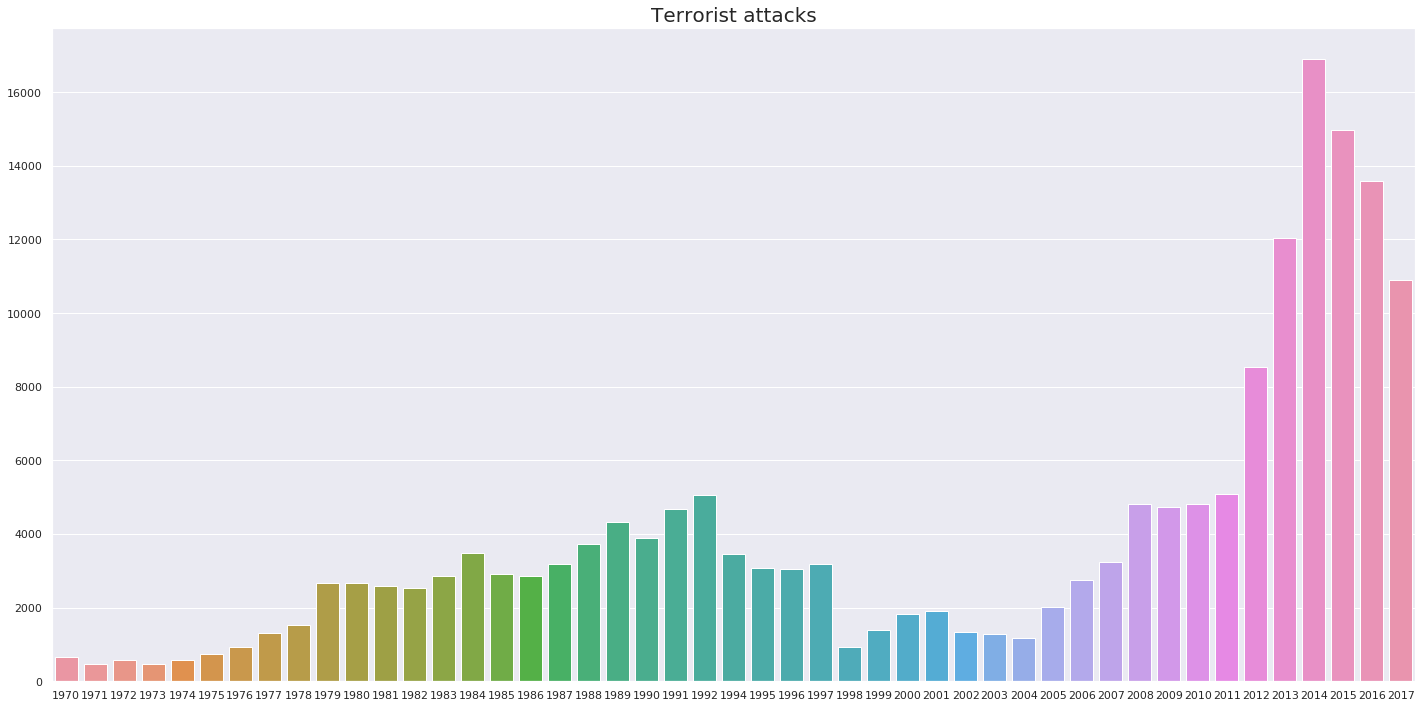

In [26]:
sns.set(font_scale=1)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=data_ter);
plt.xlabel('')
plt.ylabel('')
plt.title('Terrorist attacks', fontsize=20)
plt.tight_layout()

This bar chart also does not inspire optimism - the overwhelming majority of attacks end successfully

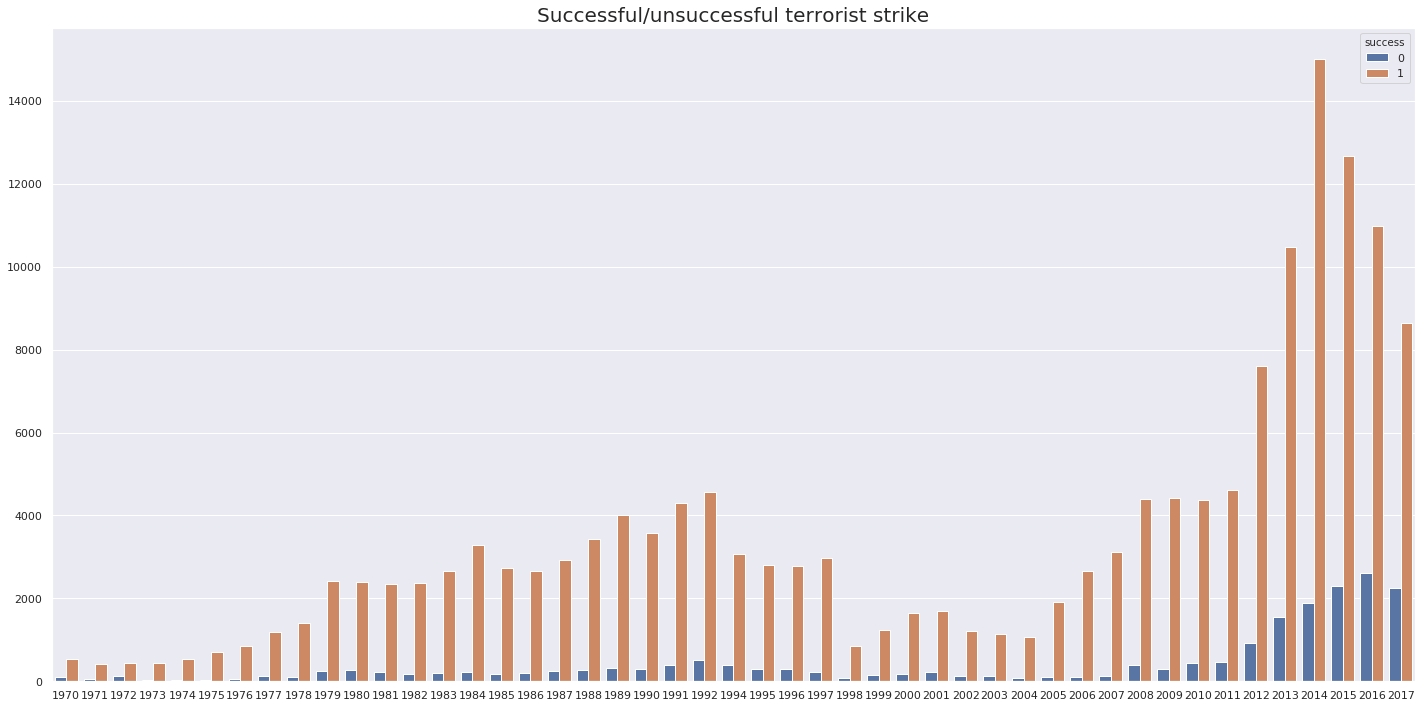

In [28]:
sns.set(font_scale=1)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=data_ter,hue='success');
plt.xlabel('')
plt.ylabel('')
plt.title('Successful/unsuccessful terrorist strike', fontsize=20)
plt.tight_layout()

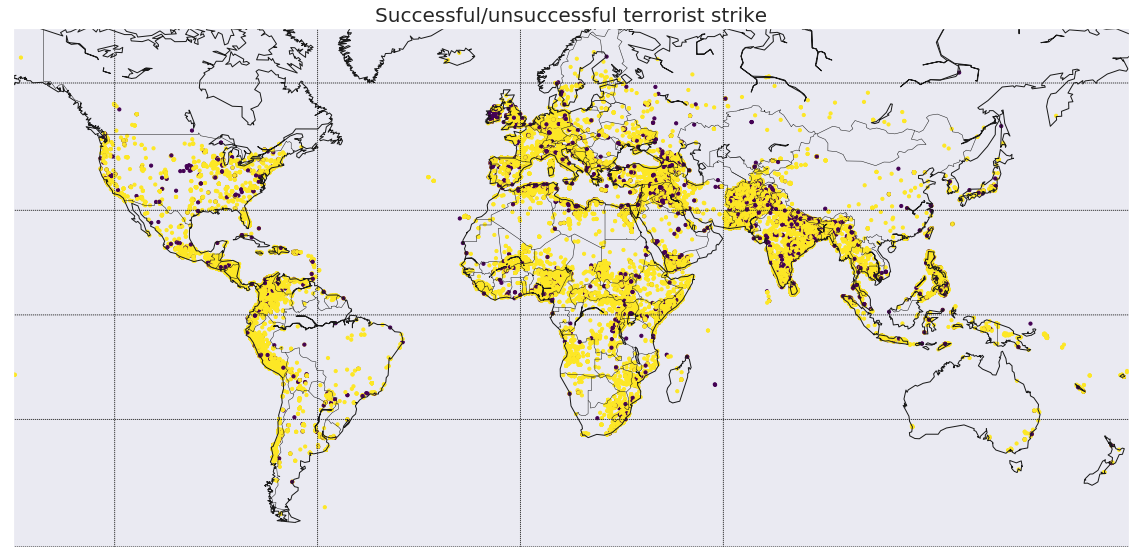

In [27]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
plt.title('Successful/unsuccessful terrorist strike', fontsize=20)
mapWorld(col1='success', size2=False,label4='',metr=10,colmap='viridis',ds=data_ter)

What share of incidents was a suicide attack?

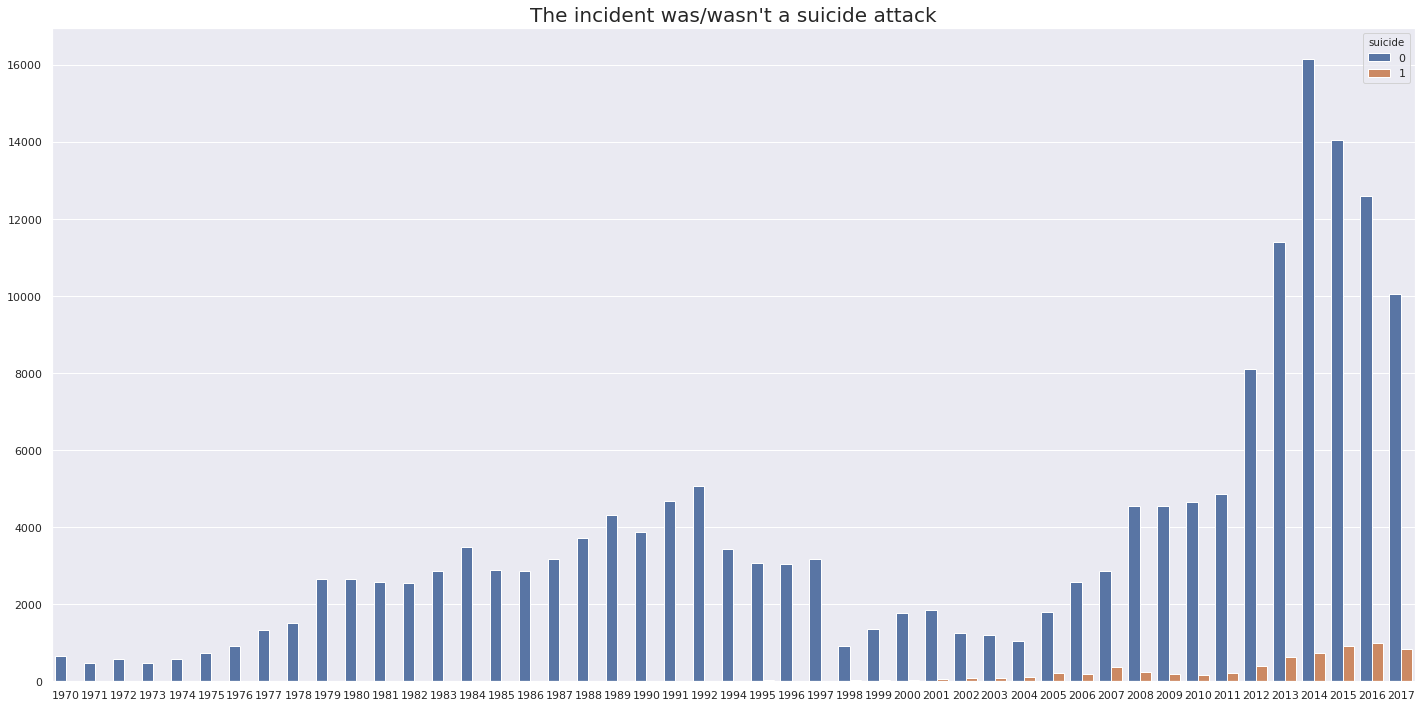

In [35]:
sns.set(font_scale=1)
fig = plt.figure(figsize=(20,10))
sns.countplot(x='iyear',data=data_ter,hue='suicide');
plt.title("The incident was/wasn't a suicide attack", fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

The most frequent types of attacks have not changed much - armed assault and bombing/explosion pushed out assassination. The share of use of bombs increases - terrorist attacks began to be massive and aimed at hitting a large number of people.

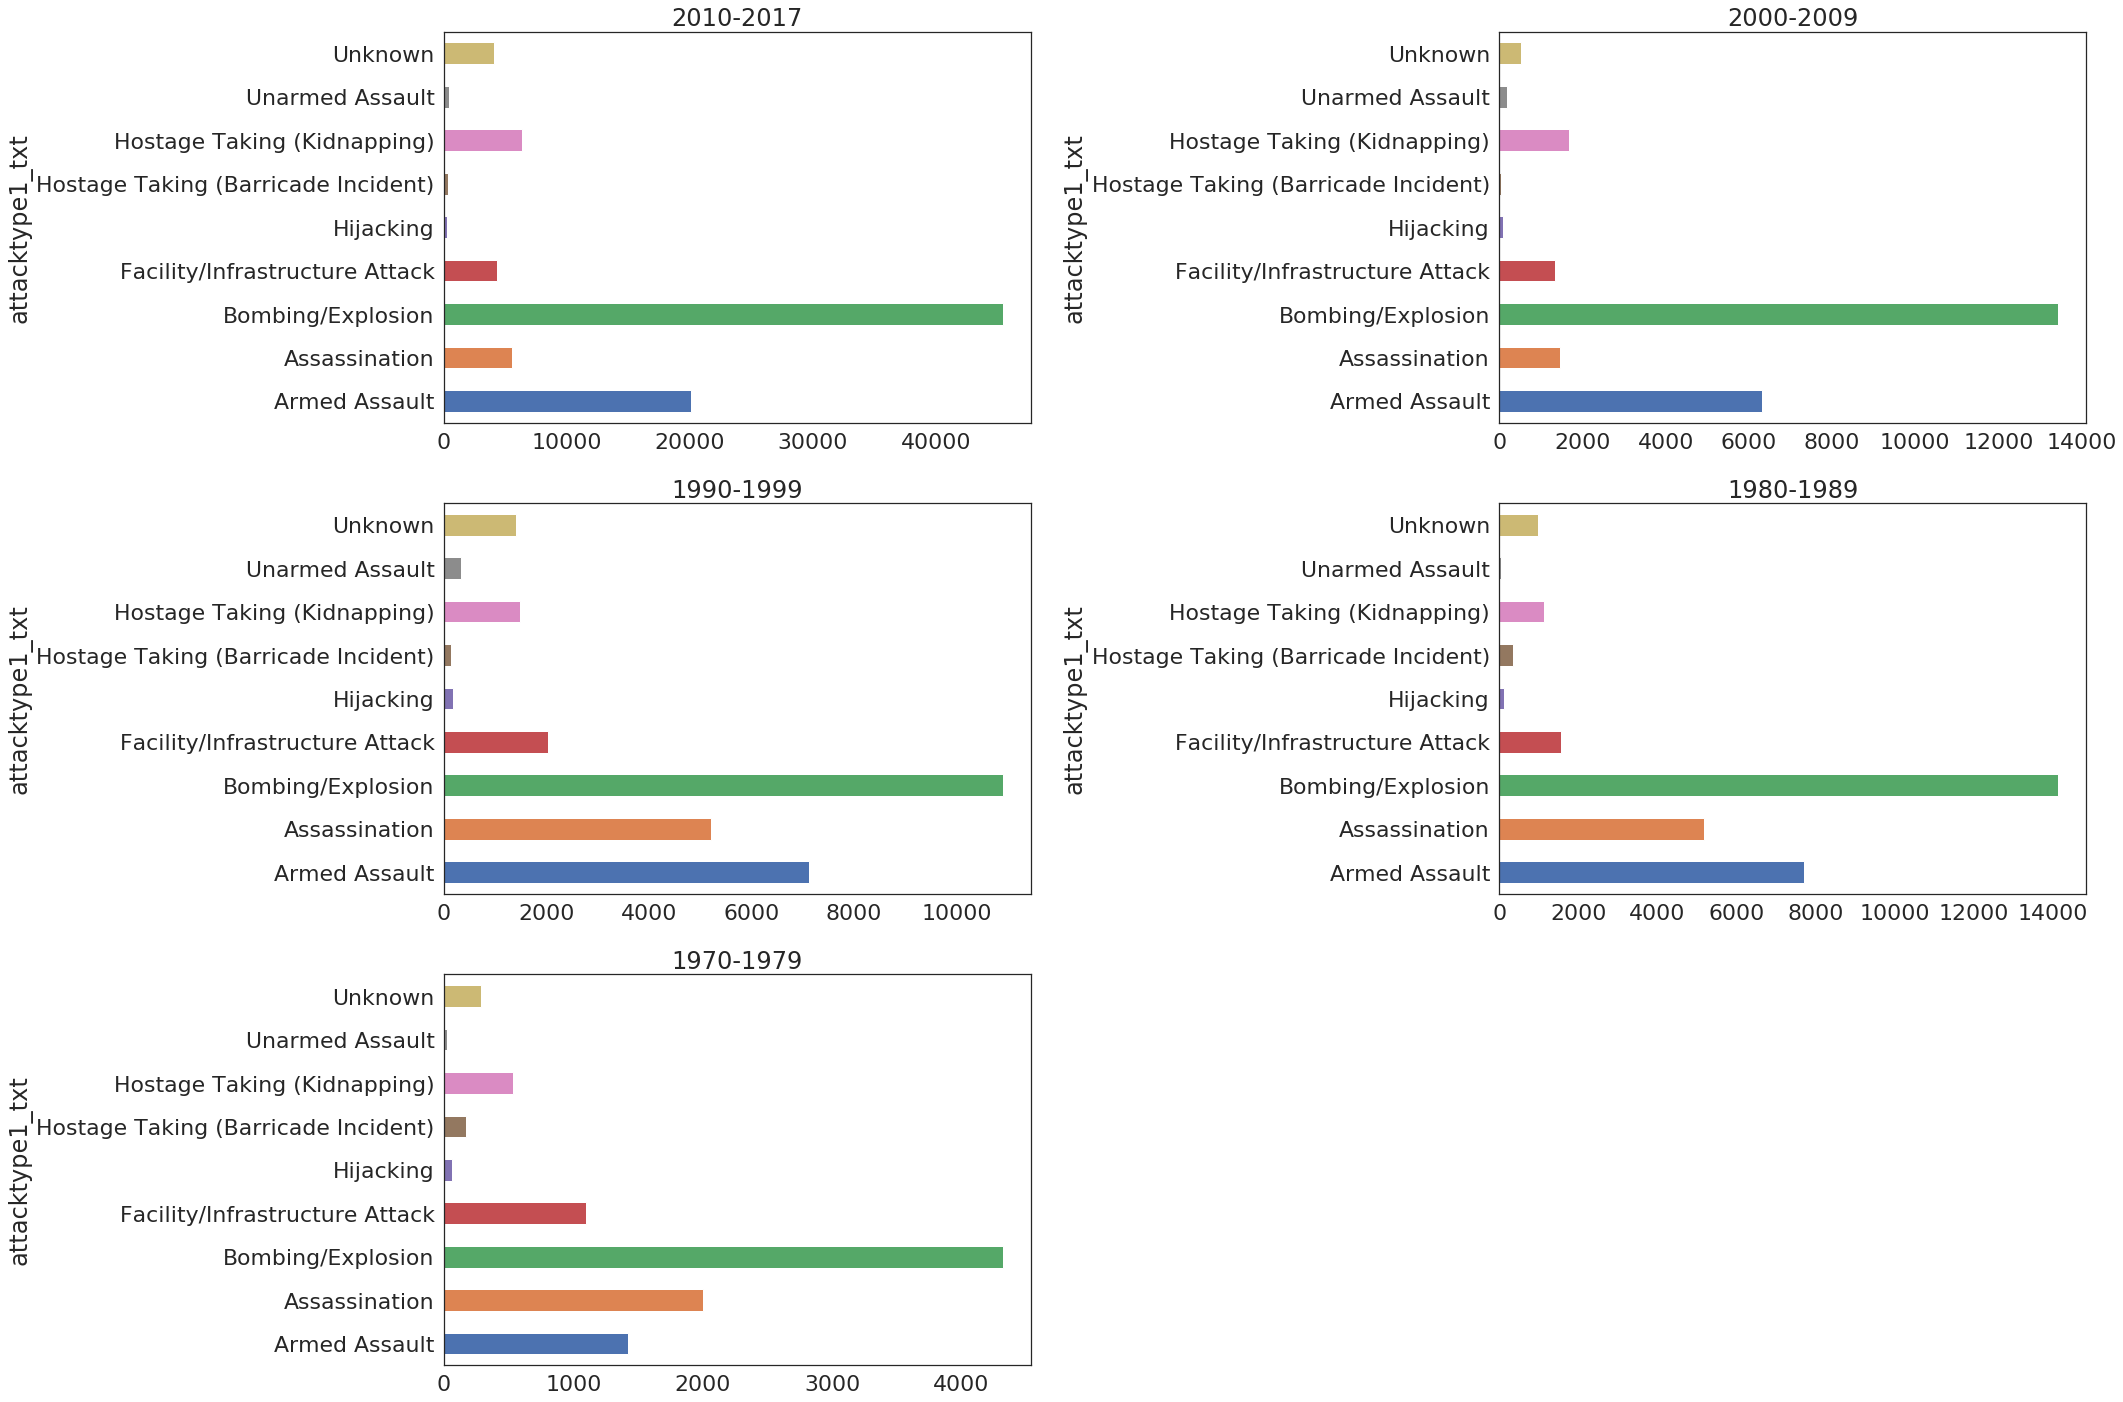

In [37]:
plot_by_years(kind='attacktype1_txt');

Different types of targets for terrorists:

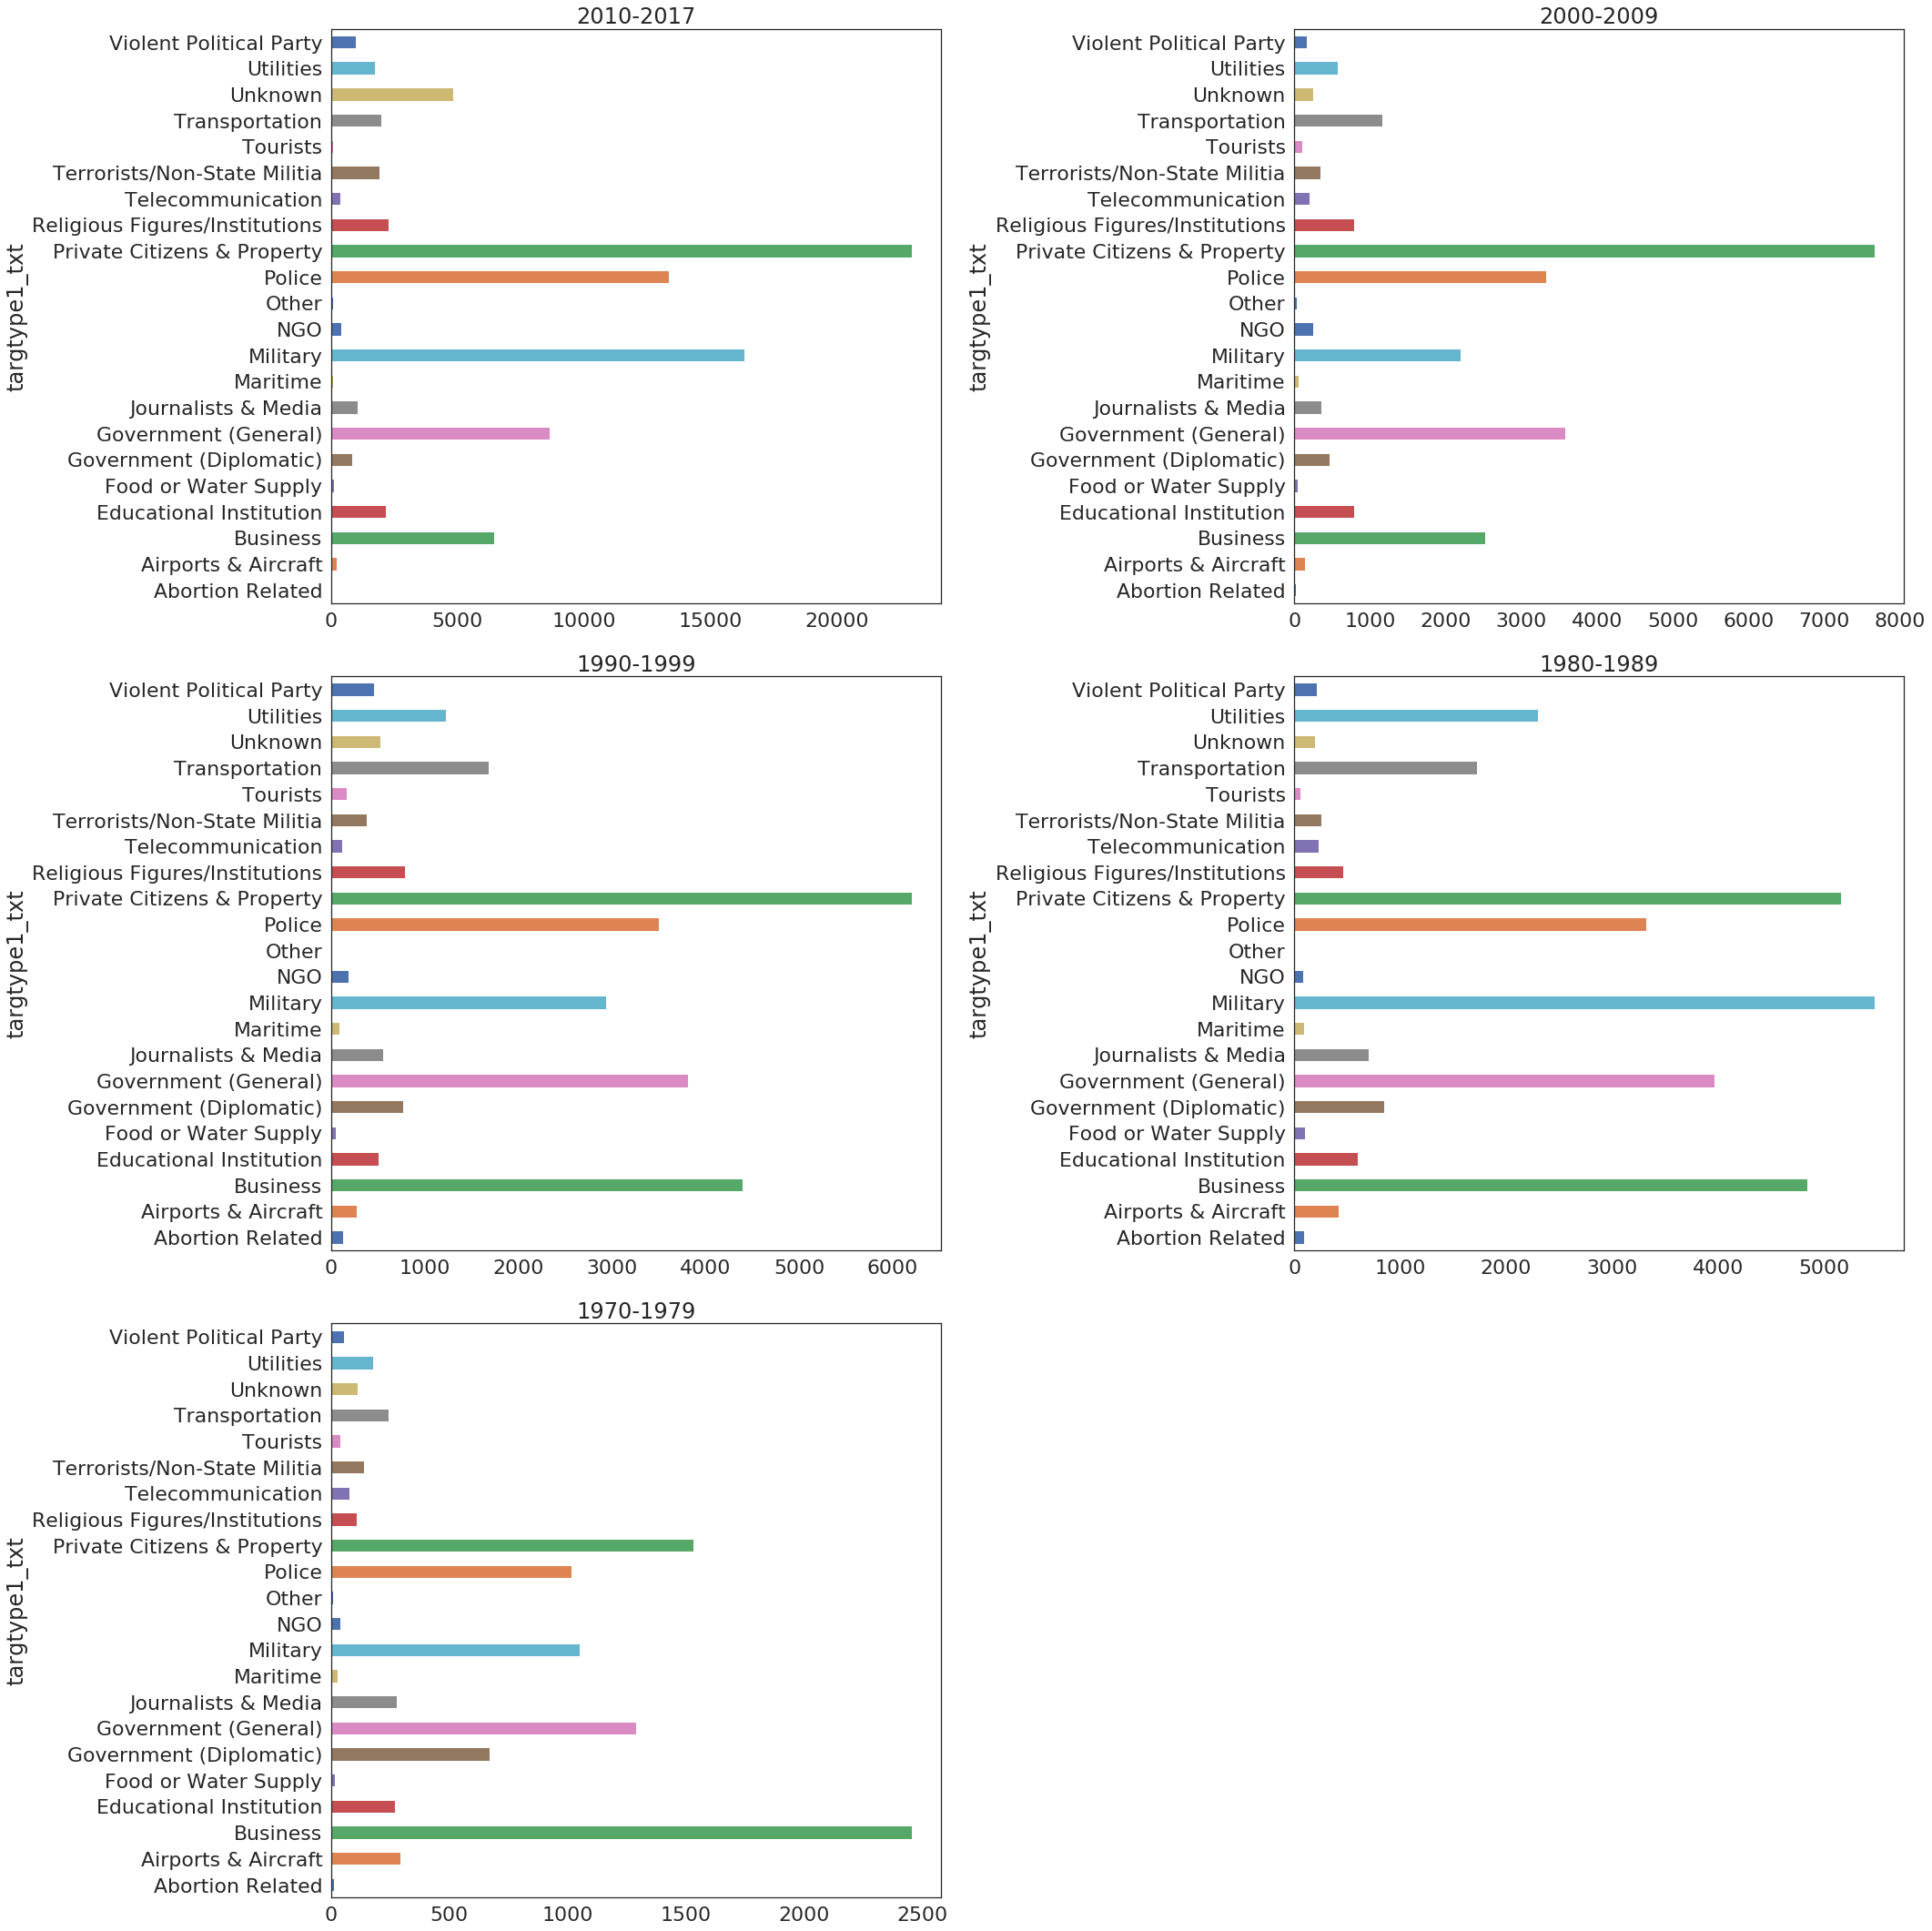

In [14]:
plot_by_years(kind='targtype1_txt',big=(30,30));

Collate this data with another kaggle dataset "The Human Freedom Index". Firstly, slightly change the data for a successful merge.

In [15]:
data_hap = pd.read_csv('../input/the-human-freedom-index/hfi_cc_2018.csv')
data_hap.head(3)

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,...,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,10.0,10.000000,10.000000,10.00000,10.0,7.5,5.0,5.0,5.0,7.500000,8.806810,5.0,10.0,5.0,6.666667,NaN,NaN,10.0,9.566667,8.011111,9.192593,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,...,9.74360,10.0,9.553657,9.626667,9.24,8.0240,8.963556,5.574481,9.405328,7.489905,10.00000,6.306106,4.615385,8.296923,6.406138,8.214900,5.0,7.295687,9.0,7.098562,5.566667,5.396399,6.234861,8.0,6.299741,10.0,6.916278,6.072172,6.000000,9.713864,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,5.0,9.926119,9.990149,8.84206,10.0,7.5,0.0,0.0,0.0,5.833333,8.043882,5.0,5.0,5.0,5.000000,NaN,NaN,5.0,6.873333,2.961111,4.944815,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,...,8.72046,5.0,7.253894,8.480000,6.22,5.9176,6.872533,4.962589,0.000000,2.481294,5.56391,3.664829,0.000000,1.106256,1.590362,4.127025,0.0,5.301526,10.0,5.100509,5.566667,3.896912,5.958321,6.0,7.755176,1.0,5.029513,3.722341,1.777778,9.243070,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,10.00000,7.5,10.000000,10.000000,8.50000,10.0,10.0,5.0,5.0,5.0,8.333333,8.297865,0.0,5.0,10.0,5.000000,NaN,NaN,10.0,8.904444,7.455556,8.786667,2.5,2.5,NaN,NaN,2.5,NaN,NaN,5.0,...,3.05400,5.0,5.606605,8.993333,7.72,4.2544,6.989244,3.132738,0.917160,2.024949,10.00000,2.946919,3.076923,0.110626,2.044823,5.264754,8.0,9.194715,4.0,7.064905,8.900000,2.656198,5.172987,4.0,6.632764,0.0,4.560325,2.758428,1.333333,8.664627,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0


In [16]:
def reg(x):
    if x in ('South America','Central America & Caribbean'):
        res = 'Latin America & the Caribbean'
    elif x=='Central Asia':
        res = 'Caucasus & Central Asia'
    elif x=='Australasia & Oceania':
        res = 'Oceania'
    elif x in('South Asia','Southeast Asia',):
            res = 'South Asia'
    else:
        res=x
    return res
data_bx = data_ter
data_bx['region_txt'] = data_bx.region_txt.apply(reg)
data_bx = data_bx[data_bx.iyear.isin(['2016','2015','2014','2013','2012','2011','2010','2009','2008'])]

Compare Human Freedom (score) and count of terrorist attacks:

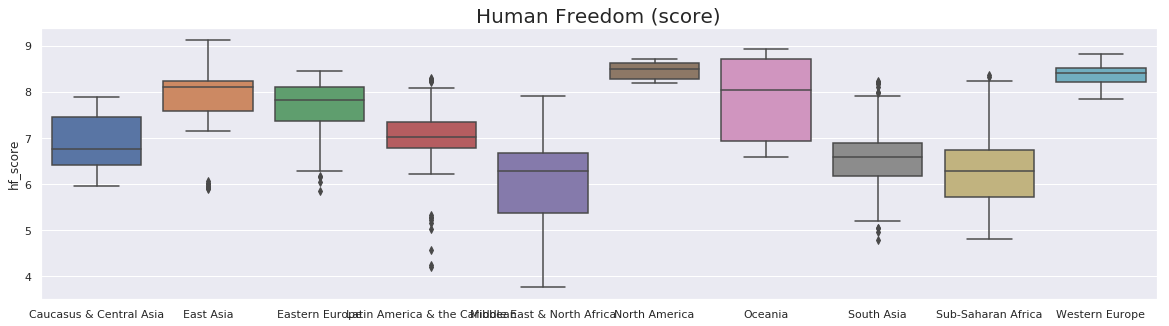

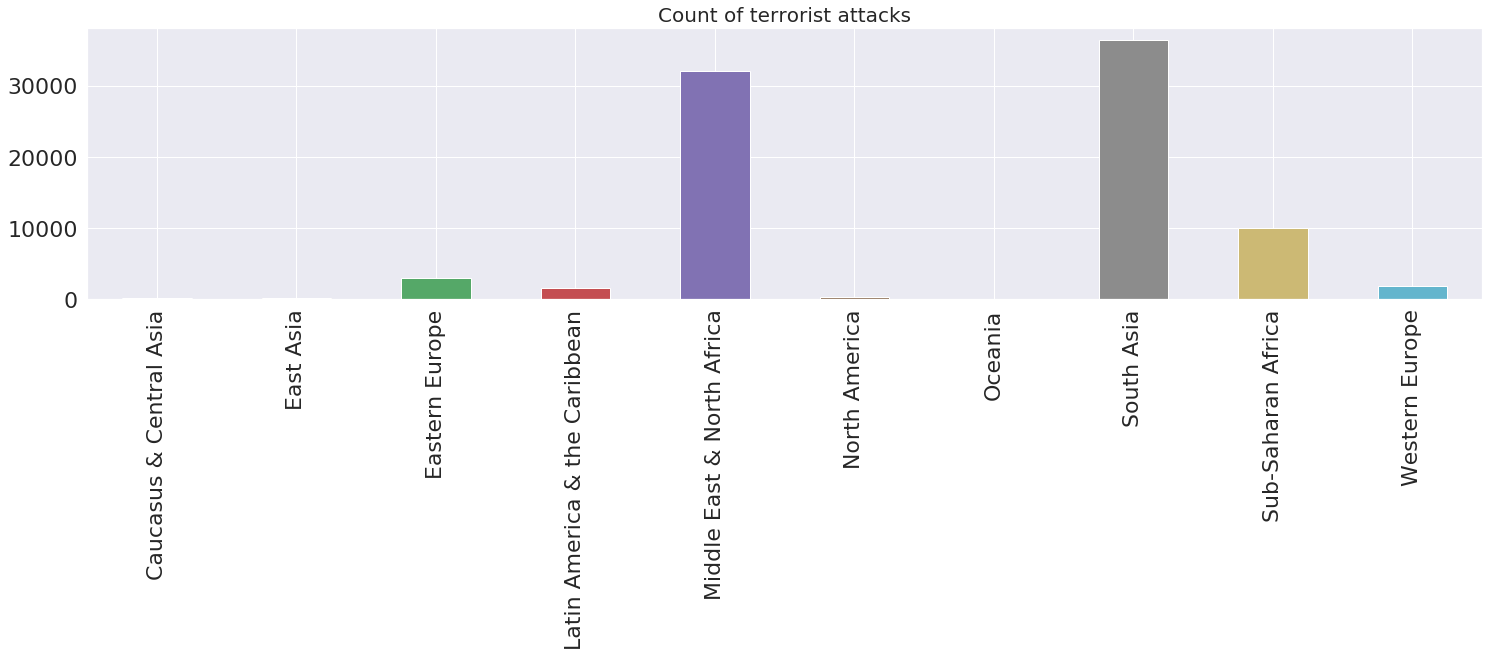

In [42]:
plt.figure(figsize=(20,5))
sns.set(font_scale=1)
sns.boxplot(x='region',y='hf_score',data=data_hap,order=['Caucasus & Central Asia','East Asia','Eastern Europe',\
                                'Latin America & the Caribbean','Middle East & North Africa','North America',\
                                    'Oceania','South Asia','Sub-Saharan Africa','Western Europe']);
plt.title("Human Freedom (score)", fontsize=20)
plt.xlabel('')
plt.show()

plt.figure(figsize=(25,5))
sns.set(font_scale=2)
data_bx['eventid'].groupby(data_ter['region_txt']).count().plot(kind='bar');
plt.title("Count of terrorist attacks", fontsize=20)
plt.xlabel('')
plt.show()
#plt.tight_layout()

Compare Personal Freedom (score) and count of terrorist attacks. We can see by plots that number of attacks is related to freedom schedules.

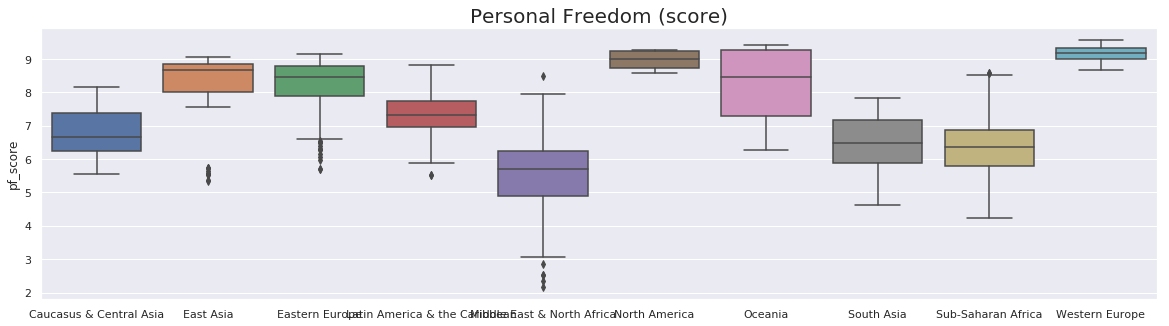

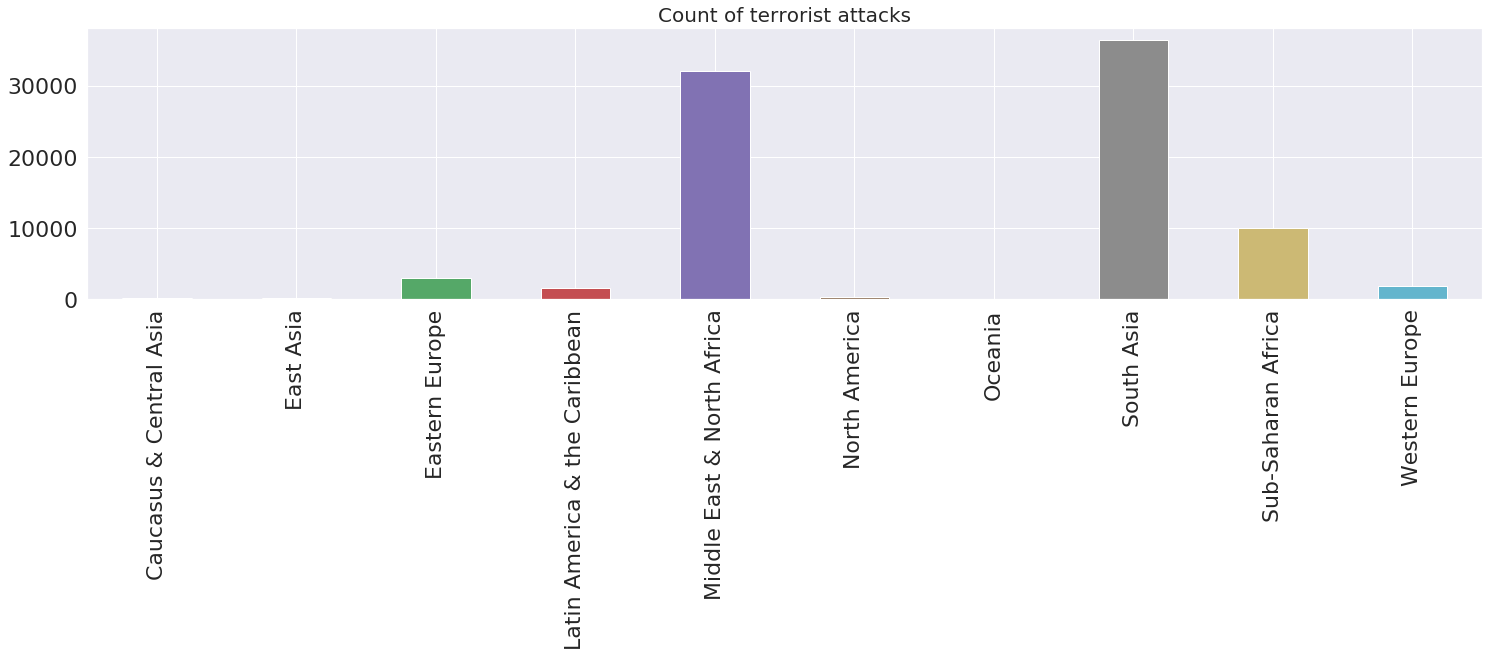

In [43]:
plt.figure(figsize=(20,5))
sns.set(font_scale=1)
sns.boxplot(x='region',y='pf_score',data=data_hap,order=['Caucasus & Central Asia','East Asia','Eastern Europe',\
                                'Latin America & the Caribbean','Middle East & North Africa','North America',\
                                    'Oceania','South Asia','Sub-Saharan Africa','Western Europe']);
plt.title("Personal Freedom (score)", fontsize=20)
plt.xlabel('')
plt.show()

plt.figure(figsize=(25,5))
sns.set(font_scale=2)
data_bx['eventid'].groupby(data_ter['region_txt']).count().plot(kind='bar');
plt.title("Count of terrorist attacks", fontsize=20)
plt.xlabel('')
plt.show()
#plt.tight_layout()

Thank you for reading!